    # Lab 8   Find the frequencies

Begin by loading the CSV file provided into a DataFrame

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/lab8.csv')
df.columns = ('Time', 'A', 'B', 'C')
df.reindex = ('Time')
df

,Time,A,B,C
0,1970-01-01 00:00:00.000000000,-0.253426,0.000000,-1.0
1,1970-01-01 00:00:00.000022676,-0.468427,0.036466,1.0
2,1970-01-01 00:00:00.000045351,0.270393,0.072883,1.0
3,1970-01-01 00:00:00.000068027,0.382936,0.109203,1.0
4,1970-01-01 00:00:00.000090703,-0.152181,0.145378,1.0
...,...,...,...,...
44095,1970-01-01 00:00:00.999886621,-0.823542,-0.181360,-1.0
44096,1970-01-01 00:00:00.999909297,0.374306,-0.145378,-1.0
44097,1970-01-01 00:00:00.999931973,0.112836,-0.109203,-1.0
44098,1970-01-01 00:00:00.999954649,0.343497,-0.072883,-1.0


Build ACF plots for each of the columns (I'd suggest using lags up to 400)

In [ ]:
series0 = pd.Series(df.A)
series0.index = df.Time  
series0

Time
1970-01-01 00:00:00.000000000   -0.253426
1970-01-01 00:00:00.000022676   -0.468427
1970-01-01 00:00:00.000045351    0.270393
1970-01-01 00:00:00.000068027    0.382936
1970-01-01 00:00:00.000090703   -0.152181
                                   ...   
1970-01-01 00:00:00.999886621   -0.823542
1970-01-01 00:00:00.999909297    0.374306
1970-01-01 00:00:00.999931973    0.112836
1970-01-01 00:00:00.999954649    0.343497
1970-01-01 00:00:00.999977324    0.058708
Name: A, Length: 44100, dtype: float64

<BarContainer object of 400 artists>

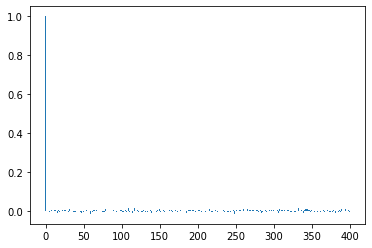

In [ ]:
lags = range(400)
corrsA = np.array([series0.autocorr(n) for n in lags])
plt.bar(lags, corrsA)

In [ ]:
series1 = pd.Series(df.B)
series1.index = df.Time  
series1

Time
1970-01-01 00:00:00.000000000    0.000000
1970-01-01 00:00:00.000022676    0.036466
1970-01-01 00:00:00.000045351    0.072883
1970-01-01 00:00:00.000068027    0.109203
1970-01-01 00:00:00.000090703    0.145378
                                   ...   
1970-01-01 00:00:00.999886621   -0.181360
1970-01-01 00:00:00.999909297   -0.145378
1970-01-01 00:00:00.999931973   -0.109203
1970-01-01 00:00:00.999954649   -0.072883
1970-01-01 00:00:00.999977324   -0.036466
Name: B, Length: 44100, dtype: float64

<BarContainer object of 400 artists>

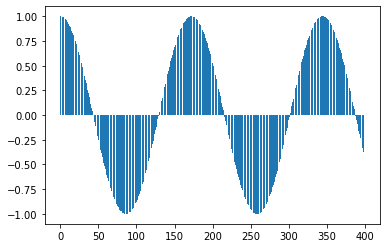

In [ ]:
lags = range(400)
corrsB = np.array([series1.autocorr(n) for n in lags])
plt.bar(lags, corrsB)

In [ ]:
series2 = pd.Series(df.C)
series2.index = df.Time  
series2

Time
1970-01-01 00:00:00.000000000   -1.0
1970-01-01 00:00:00.000022676    1.0
1970-01-01 00:00:00.000045351    1.0
1970-01-01 00:00:00.000068027    1.0
1970-01-01 00:00:00.000090703    1.0
                                ... 
1970-01-01 00:00:00.999886621   -1.0
1970-01-01 00:00:00.999909297   -1.0
1970-01-01 00:00:00.999931973   -1.0
1970-01-01 00:00:00.999954649   -1.0
1970-01-01 00:00:00.999977324   -1.0
Name: C, Length: 44100, dtype: float64

<BarContainer object of 400 artists>

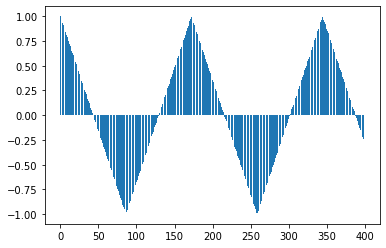

In [ ]:
lags = range(400)
corrsC = np.array([series2.autocorr(n) for n in lags])
plt.bar(lags, corrsC)

Identify which of the columns is random 

**It would appear that column A is the random one. The other two have a clear consistent pattern**

For each non-random column, find lags that give high correlation and use these to compute the frequency.  Note that you'll need to figure out the sample rate to do this.

In [ ]:
#1st Epoch for series 2 is 172 units indexed at 0
#Frequency is 257.894736842 Hertz (1/0.003877551)

series1.autocorr(0) #local maximum
series1.autocorr(44) # sign shifts negative
series1.autocorr(86) #minimum
series1.autocorr(130)# sign shifts positive
series1.autocorr(172)#maximum


-0.007888616744708608

In [ ]:
#Series 2 appears to have the same period as Series #1 even though the rate of change is steeper
#Therefore the frequency is also 257.894736842 Hertz(1/0.003877551)

series2.autocorr(0)
series2.autocorr(44) #sign flips neg
series2.autocorr(86) #minimum
series2.autocorr(130)#sign shifts positive
series2.autocorr(172)#maximum

0.9938991075800823

In [ ]:
#Since same period calculate the periods per second as hertz above
series2[0:172]

Time
1970-01-01 00:00:00.000000000   -1.0
1970-01-01 00:00:00.000022676    1.0
1970-01-01 00:00:00.000045351    1.0
1970-01-01 00:00:00.000068027    1.0
1970-01-01 00:00:00.000090703    1.0
                                ... 
1970-01-01 00:00:00.003786848   -1.0
1970-01-01 00:00:00.003809524   -1.0
1970-01-01 00:00:00.003832200   -1.0
1970-01-01 00:00:00.003854875   -1.0
1970-01-01 00:00:00.003877551   -1.0
Name: C, Length: 172, dtype: float64

Complete this lab and turn in the notebook by email by Monday, May 2nd.